Importing Libraries

In [1143]:
import pandas as pd
import numpy as np  
import matplotlib as mtl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.lines as lines

mtl.__version__

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Reading Data

In [1144]:
data=pd.read_csv('./dataset/zomato.csv')

In [1145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [1146]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Data Cleaning

###### Remove unnecessary columns and modifying columns

In [1147]:
data.drop(columns=['url','phone','address','menu_item','location','rest_type','dish_liked'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   cuisines                     51672 non-null  object
 6   approx_cost(for two people)  51371 non-null  object
 7   reviews_list                 51717 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [1148]:
data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'location','votes':'no_of_reviews'},inplace=True)

###### Drop Duplicate Rows

In [1149]:
data.drop_duplicates(inplace=True)

In [1150]:
data.info()
data.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 51642 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           51642 non-null  object
 1   online_order   51642 non-null  object
 2   book_table     51642 non-null  object
 3   rate           43888 non-null  object
 4   no_of_reviews  51642 non-null  int64 
 5   cuisines       51597 non-null  object
 6   cost           51297 non-null  object
 7   reviews_list   51642 non-null  object
 8   type           51642 non-null  object
 9   location       51642 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.3+ MB


rate             7754
cost              345
cuisines           45
name                0
online_order        0
book_table          0
no_of_reviews       0
reviews_list        0
type                0
location            0
dtype: int64

###### Correcting datatype of  Rate,Cost and Cuisine Columns

In [1151]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [1152]:
# modify rate column

data['rate']=data['rate'].str.split('/').str[0]
data['rate'].replace(['NEW','-'],np.nan,inplace=True)
data['rate']=data['rate'].astype(float)


In [1153]:

data['rate'].fillna(data['rate'].mean(),inplace=True)

In [1154]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [1155]:

data['cost'] = (data['cost'].replace([',','nan'], np.nan,regex=True).astype(float))


In [1156]:
data['cost'].unique()

array([800., 300., 600., 700., 550., 500., 450., 650., 400., 900., 200.,
       750., 150., 850., 100.,  nan, 350., 250., 950., 199.,  80., 160.,
       230., 130.,  50., 190., 180., 330.,  40., 120., 469.,  70.,  60.,
       560., 240., 360., 140.])

In [1157]:
data['cost'].fillna(data['cost'].mean(),inplace=True)

In [1158]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [1159]:
data['cuisines']=data['cuisines'].str.split(",")

In [1160]:
data.info()
#data.isna().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
Index: 51642 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           51642 non-null  object 
 1   online_order   51642 non-null  object 
 2   book_table     51642 non-null  object 
 3   rate           51642 non-null  float64
 4   no_of_reviews  51642 non-null  int64  
 5   cuisines       51597 non-null  object 
 6   cost           51642 non-null  float64
 7   reviews_list   51642 non-null  object 
 8   type           51642 non-null  object 
 9   location       51642 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


###### Drop the empty rows of cuisines

In [1161]:
data.dropna(subset=['cuisines'],inplace=True)

In [1162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51597 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           51597 non-null  object 
 1   online_order   51597 non-null  object 
 2   book_table     51597 non-null  object 
 3   rate           51597 non-null  float64
 4   no_of_reviews  51597 non-null  int64  
 5   cuisines       51597 non-null  object 
 6   cost           51597 non-null  float64
 7   reviews_list   51597 non-null  object 
 8   type           51597 non-null  object 
 9   location       51597 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [1163]:
data.describe()

,rate,no_of_reviews,cost
count,51597.000000,51597.000000,51597.000000
mean,3.700571,284.208171,416.716293
std,0.395696,804.638322,180.504059
min,1.800000,0.000000,40.000000
25%,3.500000,7.000000,300.000000
50%,3.700526,41.000000,400.000000
75%,3.900000,199.000000,500.000000
max,4.900000,16832.000000,950.000000


One Hot Encoding

In [1164]:
df_encoded=pd.get_dummies(data,columns=['online_order','book_table'],drop_first=True)
df_encoded.head()

,name,rate,no_of_reviews,cuisines,cost,reviews_list,type,location,online_order_Yes,book_table_Yes
0,Jalsa,4.1,775,"[North Indian, Mughlai, Chinese]",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,True,True
1,Spice Elephant,4.1,787,"[Chinese, North Indian, Thai]",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,True,False
2,San Churro Cafe,3.8,918,"[Cafe, Mexican, Italian]",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,True,False
3,Addhuri Udupi Bhojana,3.7,88,"[South Indian, North Indian]",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,False,False
4,Grand Village,3.8,166,"[North Indian, Rajasthani]",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,False,False


In [1165]:
df_encoded.rename(columns={'online_order_Yes':'online_order','book_table_Yes':'book_table'},inplace=True)
data=df_encoded

In [1166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51597 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           51597 non-null  object 
 1   rate           51597 non-null  float64
 2   no_of_reviews  51597 non-null  int64  
 3   cuisines       51597 non-null  object 
 4   cost           51597 non-null  float64
 5   reviews_list   51597 non-null  object 
 6   type           51597 non-null  object 
 7   location       51597 non-null  object 
 8   online_order   51597 non-null  bool   
 9   book_table     51597 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 3.6+ MB


in

###### Normalizing the numerical datatypes

In [1167]:
def minmaxnormalize(column):
     data["norm"+column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())     


In [1168]:
numerical_columns = data.select_dtypes(include=np.number).columns

for column in numerical_columns:
    minmaxnormalize(column)

data.head()

,name,rate,no_of_reviews,cuisines,cost,reviews_list,type,location,online_order,book_table,normrate,normno_of_reviews,normcost
0,Jalsa,4.1,775,"[North Indian, Mughlai, Chinese]",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,True,True,0.741935,0.046043,0.835165
1,Spice Elephant,4.1,787,"[Chinese, North Indian, Thai]",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,True,False,0.741935,0.046756,0.835165
2,San Churro Cafe,3.8,918,"[Cafe, Mexican, Italian]",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,True,False,0.645161,0.054539,0.835165
3,Addhuri Udupi Bhojana,3.7,88,"[South Indian, North Indian]",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,False,False,0.612903,0.005228,0.285714
4,Grand Village,3.8,166,"[North Indian, Rajasthani]",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,False,False,0.645161,0.009862,0.615385


### Visualizations

##### Location Based Analysis

###### Top 10 Location with highest count of restaurants

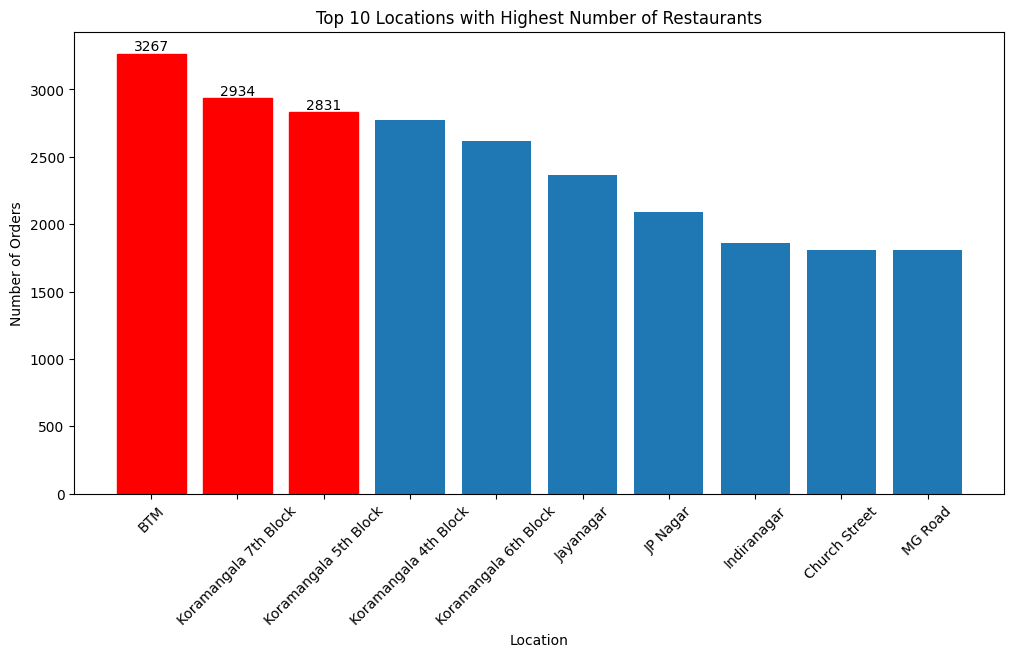

In [1169]:
top_10_location = data['location'].value_counts()[:10]

plt.figure(figsize=(12, 6))

barplot=plt.bar(top_10_location.index, top_10_location.values)

for i, bar in enumerate(barplot.patches):
    if i < 3:
        bar.set_color('red')
        plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')


plt.title('Top 10 Locations with Highest Number of Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)


    
plt.show()

###### You can find the best restaurants at

In [1170]:
rate_based_on_location = data.groupby('location')['rate'].mean().sort_values(ascending=False)[:10]
rate_based_on_location

location
Church Street            3.788919
MG Road                  3.786460
Brigade Road             3.784935
Residency Road           3.768172
Lavelle Road             3.764052
Koramangala 6th Block    3.751775
Koramangala 4th Block    3.748616
Koramangala 5th Block    3.748567
Koramangala 7th Block    3.747678
Indiranagar              3.738515
Name: rate, dtype: float64

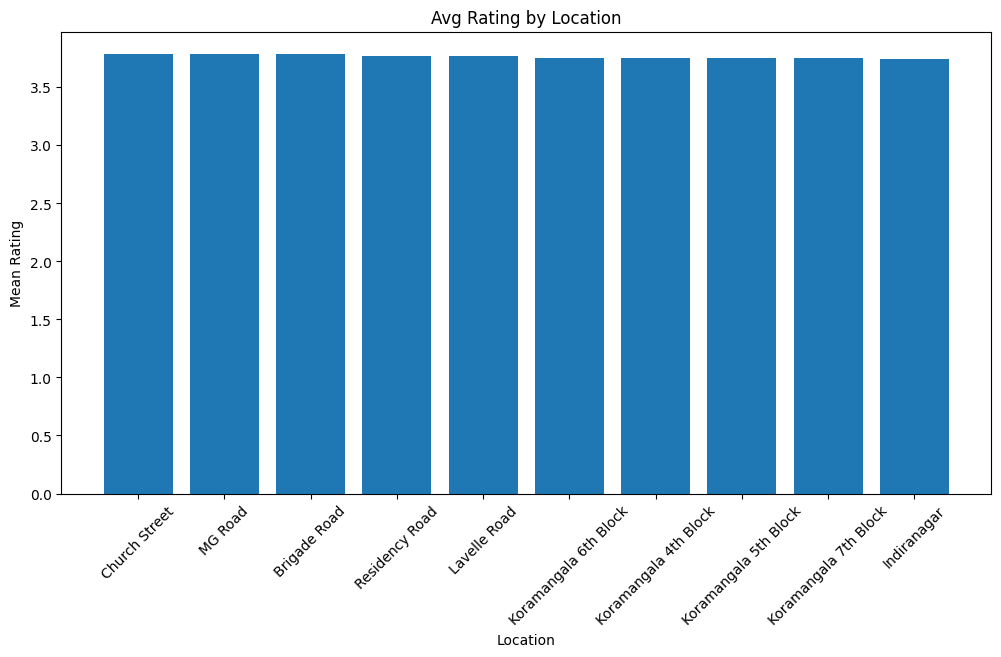

In [1171]:
plt.figure(figsize=(12, 6))
plt.bar(rate_based_on_location.index,rate_based_on_location.values)
plt.title('Avg Rating by Location')
plt.xlabel('Location')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.show()


###### Comparing Restauants based on Online Delivery and Table Booking

51597


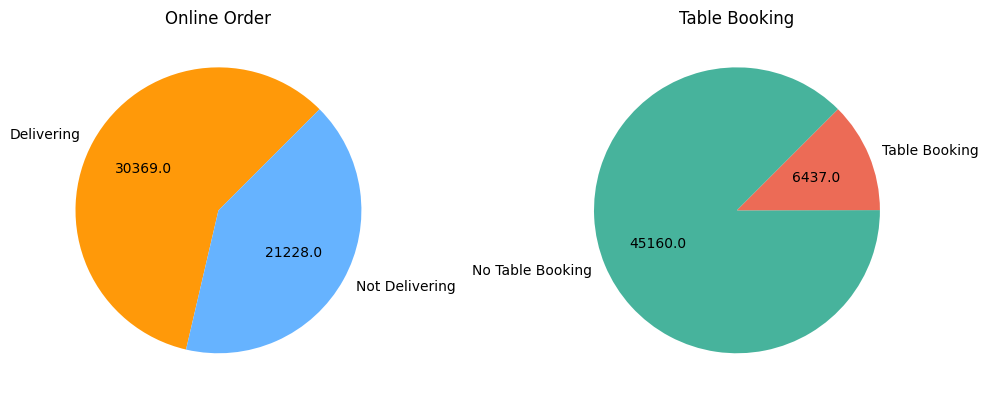

In [1172]:
online_order = data['online_order'].value_counts()

book_table = data['book_table'].value_counts()

print(online_order.sum())

def actual_value(x):
    a  = np.round(x/100.*len(data), 0)
    return a
    

fig = plt.figure(figsize=(10, 5))  # Set figure size

# Left subplot (1 row, 2 columns, 1st plot)
plt.subplot(1, 2, 1)
plt.pie(online_order, labels=["Delivering","Not Delivering"], startangle=45, colors=['#ff9909','#66b3ff'],autopct=actual_value)
plt.title("Online Order")



plt.subplot(1, 2, 2)
plt.pie(book_table, labels=["No Table Booking","Table Booking"], startangle=45, colors=['#47B39C','#EC6B56'],autopct=actual_value)
plt.title("Table Booking")


plt.tight_layout() 
plt.show()

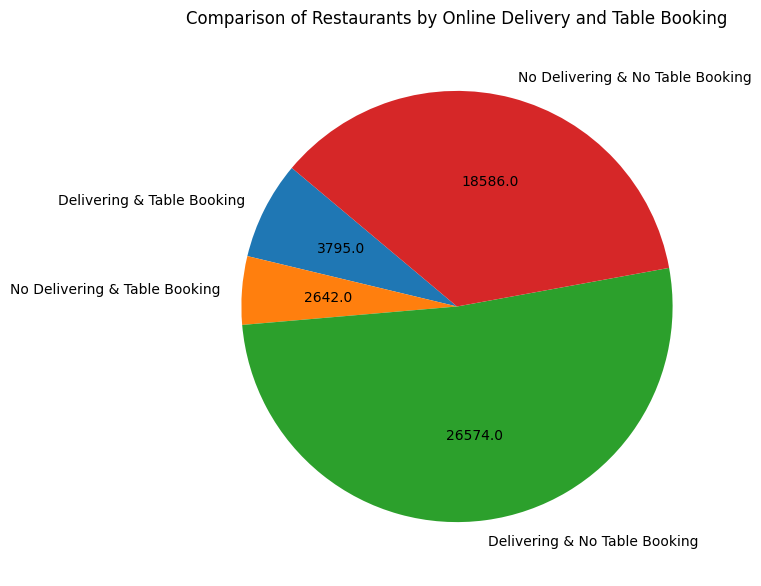

In [1173]:

d_t = len(data[(data['online_order'] ) & (data['book_table'])])
nd_t = len(data[( data['online_order']==False) & (data['book_table'] )])
d_nt = len(data[(data['online_order']) & ( data['book_table']==False)])
nd_nt = len(data[(  data['online_order'] == False) & (data['book_table']==False)])



counts = [d_t, nd_t, d_nt, nd_nt]

labels = ['Delivering & Table Booking', 'No Delivering & Table Booking', 'Delivering & No Table Booking', 'No Delivering & No Table Booking']

plt.figure(figsize=(10, 7))
plt.pie(counts, labels=labels, autopct=actual_value, startangle=140)
plt.title('Comparison of Restaurants by Online Delivery and Table Booking',pad=10)
plt.show()

###### Top 10 most common cuisines

In [1174]:
data['cuisines']

0                [North Indian,  Mughlai,  Chinese]
1                   [Chinese,  North Indian,  Thai]
2                        [Cafe,  Mexican,  Italian]
3                     [South Indian,  North Indian]
4                       [North Indian,  Rajasthani]
                            ...                    
51712                                 [Continental]
51713                                 [Finger Food]
51714                                 [Finger Food]
51715                                 [Finger Food]
51716    [Finger Food,  North Indian,  Continental]
Name: cuisines, Length: 51597, dtype: object

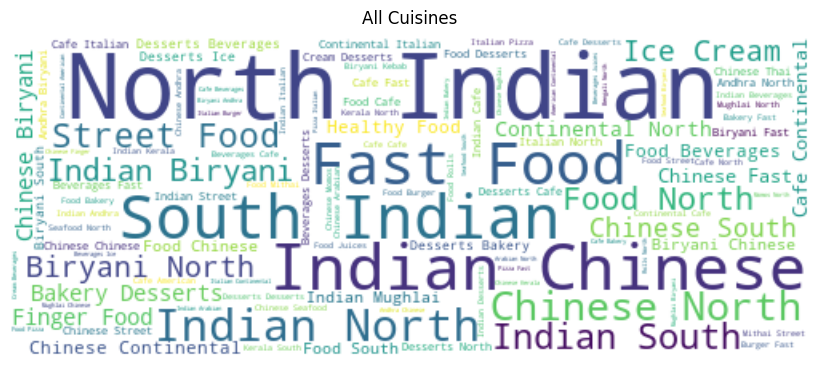

In [1175]:

all_cuisines = data['cuisines'].explode()

text = ', '.join(all_cuisines.tolist())

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, max_words = 150).generate(text)

plt.figure( figsize=(8,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('All Cuisines',pad=10)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

cuisines
North Indian     21053
 Chinese         12465
 Fast Food        5499
South Indian      5004
Cafe              4327
 Continental      3916
 South Indian     3630
 Beverages        3486
 Desserts         3481
Name: count, dtype: int64


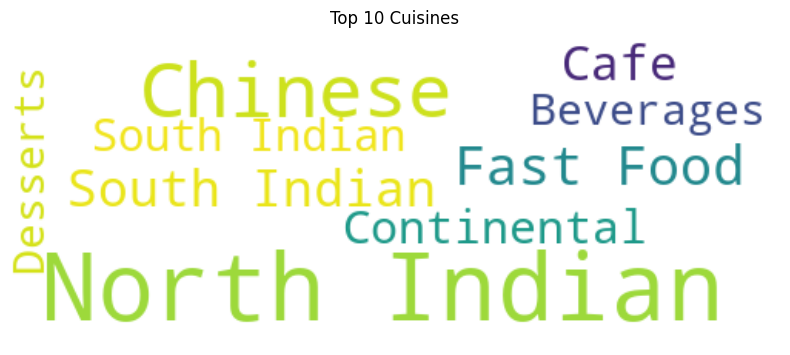

In [1176]:

top_10_cuisines = all_cuisines.value_counts().head(10)

top_10_cuisines[1]=top_10_cuisines[1]+top_10_cuisines[2]
top_10_cuisines.drop(index=' North Indian',inplace=True)

print(top_10_cuisines.sort_values(ascending=False))

text = ', '.join(top_10_cuisines.index)

wordcloud = WordCloud(background_color='white', width=500, height=200, max_words=150).generate_from_frequencies(top_10_cuisines)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 10 Cuisines', pad=10)
plt.axis('off')
plt.tight_layout()
plt.show()

How are ratings,no of reviews and cost related? and Distributions

In [1177]:

corr_data = pd.concat([data['rate'], data['cost'],data['no_of_reviews']], axis=1)

correlation_matrix = corr_data.corr()

print(correlation_matrix)


                   rate      cost  no_of_reviews
rate           1.000000  0.134070       0.427339
cost           0.134070  1.000000       0.172494
no_of_reviews  0.427339  0.172494       1.000000


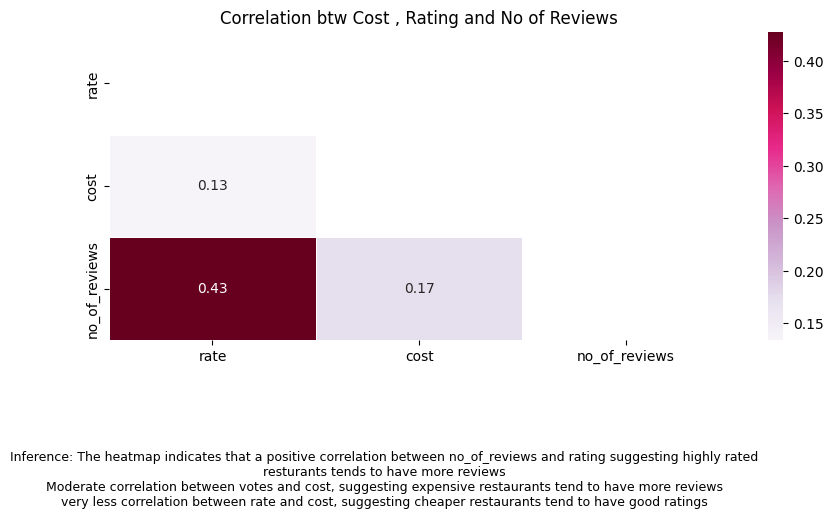

In [1178]:
plt.figure(figsize=(10,4))
matrix = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', linewidths=0.5,mask=matrix)

plt.title('Correlation btw Cost , Rating and No of Reviews')

plt.figtext(0.4,-0.3, "Inference: The heatmap indicates that a positive correlation between no_of_reviews and rating suggesting highly rated resturants tends to have more reviews\n"
                       "Moderate correlation between votes and cost, suggesting expensive restaurants tend to have more reviews\n"
                       "very less correlation between rate and cost, suggesting cheaper restaurants tend to have good ratings",
             wrap=True,horizontalalignment='center', fontsize=9)
plt.show()

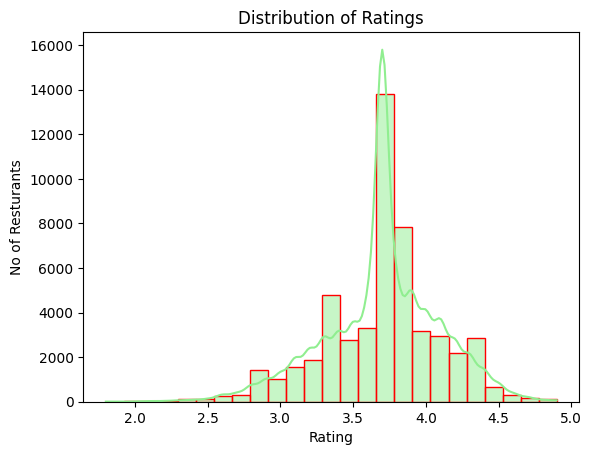

In [1179]:
sns.histplot(data['rate'],binwidth=0.125, kde=True, color='lightgreen', edgecolor='red')
 
plt.xlabel('Rating')
plt.ylabel('No of Resturants')
plt.title('Distribution of Ratings')
 

plt.show()

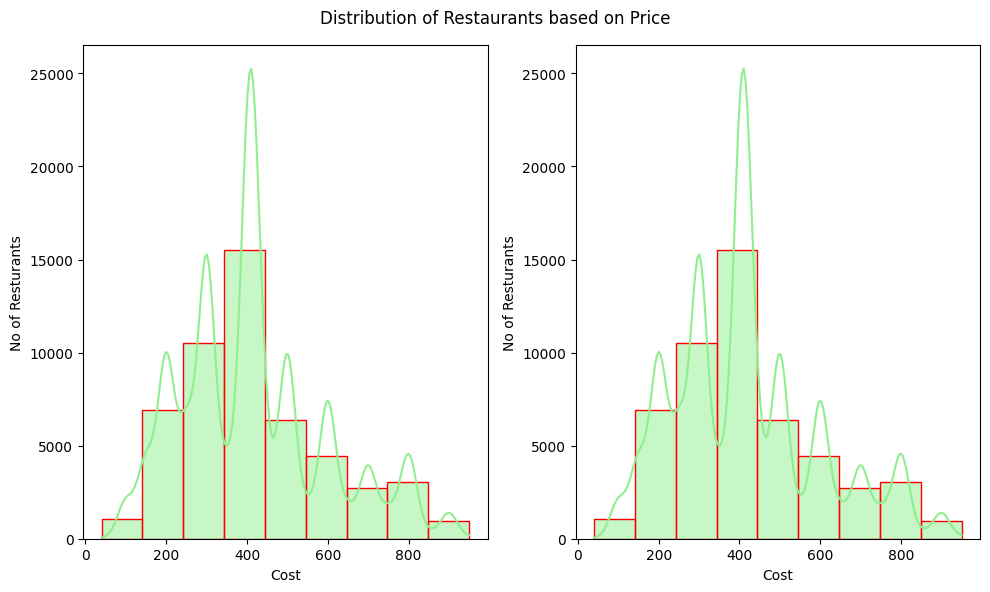

In [1180]:
plt.figure(figsize=(10,6))
plt.suptitle('Distribution of Restaurants based on Price')

plt.subplot(1,2,1)
sns.histplot(data['cost'],binwidth=100, kde=True, color='lightgreen', edgecolor='red')
plt.xlabel('Cost')
plt.ylabel('No of Resturants')



plt.subplot(1,2,2)
sns.histplot(data[data['cost']<2200]['cost'],binwidth=100, kde=True, color='lightgreen', edgecolor='red')

plt.xlabel('Cost')
plt.ylabel('No of Resturants')
plt.tight_layout()
plt.show()

In [1181]:
print("Mean:" ,data['cost'].mean())
print("Median:", data['cost'].median())

#Mean greater than median indicates that the data is right skeweness
#Tail on right side of the distribution is longer than the left side

data['cost'].skew()

Mean: 416.7162927087273
Median: 400.0


np.float64(0.6305186089861695)

Top Restaurant Chains

In [1182]:
restaurant_chains = data.groupby('name').agg(
    mean_rating=('normrate', 'mean'),mean_cost=('normcost','mean'),
    locations=('location', lambda x: ', '.join(x.unique()))
).reset_index()


restaurant_chains = restaurant_chains.sort_values(by='mean_rating', ascending=False)

top_10_rc=restaurant_chains.head(10)

restaurant_chains = top_10_rc['name']


top_10_rc


,name,mean_rating,mean_cost,locations
1274,Byg Brewski Brewing Company,1.000000,0.413950,"Bellandur, Sarjapur Road"
6539,Sante Spa Cuisine,1.000000,0.413950,Old Airport Road
597,Asia Kitchen By Mainland China,1.000000,0.413950,"BTM, Jayanagar, Koramangala 4th Block, Koraman..."
5923,Punjab Grill,0.990783,0.413950,"Brookefield, Malleshwaram, Rajajinagar, Whitef..."
865,Belgian Waffle Factory,0.982202,0.395604,"Brigade Road, BTM, Church Street, Frazer Town,..."
2597,Flechazo,0.967742,0.413950,"Brookefield, Marathahalli, Whitefield"
5468,O.G. Variar & Sons,0.967742,0.175824,"Malleshwaram, Rajajinagar"
8028,The Pizza Bakery,0.967742,0.413950,"Indiranagar, Old Airport Road"
129,AB's - Absolute Barbecues,0.964346,0.413950,"Bellandur, Brookefield, BTM, Jayanagar, JP Nag..."
803,Barbecue by Punjab Grill,0.951613,0.413950,"Malleshwaram, Rajajinagar"


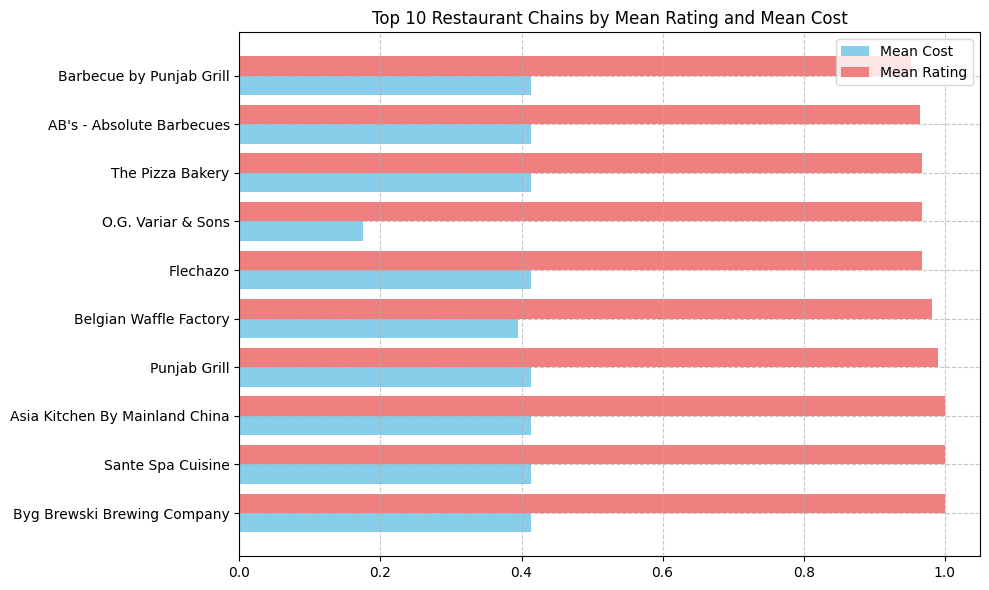

In [1183]:

fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(restaurant_chains.unique()))


ax.barh(y_pos - 0.2, top_10_rc['mean_cost'], height=0.4, label='Mean Cost', color='skyblue')
ax.barh(y_pos + 0.2, top_10_rc['mean_rating'], height=0.4, label='Mean Rating', color='lightcoral')

ax.set_yticks(y_pos)
ax.set_yticklabels(restaurant_chains.unique())
ax.set_title('Top 10 Restaurant Chains by Mean Rating and Mean Cost')
ax.legend()


ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

How to reviews and ratings vary across restaurant types?

In [1184]:
data['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [1185]:
rest_type_group=data.groupby('type').agg(
    mean_rating=('normrate', 'mean'),mean_cost=('normcost','mean')
).reset_index().sort_values(by='mean_rating', ascending=False)


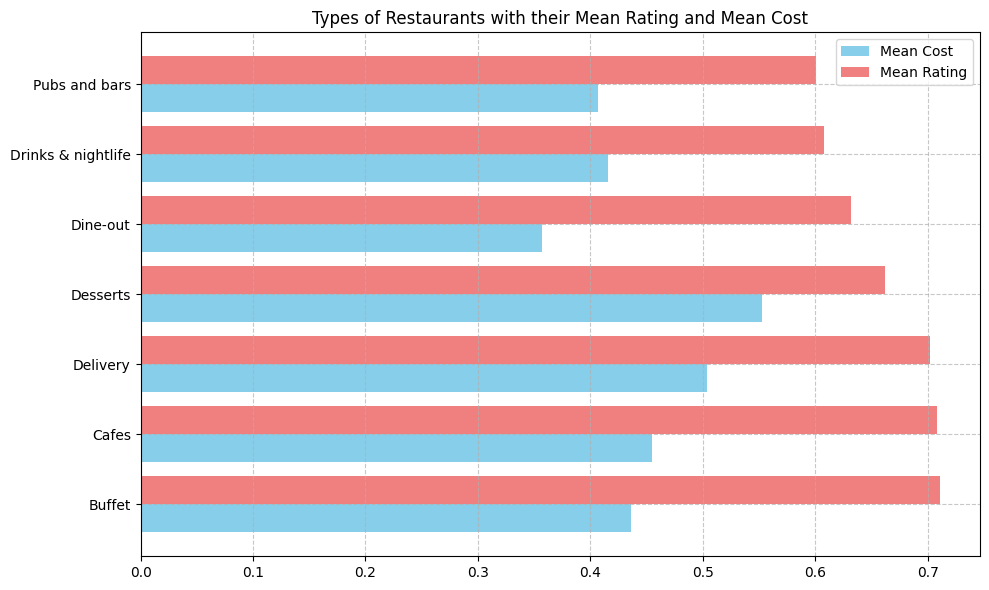

In [1186]:

fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(data['type'].unique()))

ax.barh(y_pos - 0.2, rest_type_group['mean_cost'], height=0.4, label='Mean Cost', color='skyblue')
ax.barh(y_pos + 0.2, rest_type_group['mean_rating'],height=0.4, label='Mean Rating', color='lightcoral')


ax.set_yticks(y_pos)
ax.set_yticklabels(data['type'].unique())

ax.set_title('Types of Restaurants with their Mean Rating and Mean Cost')
ax.legend()

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

IQR Analysis

In [1189]:
from scipy.stats import iqr

cost_iqr = iqr(data['cost'])
q1= np.percentile(data['cost'], 25)
q2= np.percentile(data['cost'], 50)
q3= np.percentile(data['cost'], 75)

cost_lower = q1- 1.5 * cost_iqr
cost_upper = q3 + 1.5 * cost_iqr
print("Cost IQR Analysis")
print(f"Min Boundary:{cost_lower} Q1 Value:{q1} Mean {q2}  Q3 Value:{q3} Max Boundary:{cost_upper}\n")



rate_iqr = iqr(data['rate'])
q1= np.percentile(data['rate'], 25)
q3= np.percentile(data['rate'], 75)
rate_lower = q1- 1.5 * rate_iqr
rate_upper = q3 + 1.5 * rate_iqr

print("Rate IQR Analysis")
print(f"Min Boundary:{rate_lower:.2f} Q1 Value:{q1} Mean {q2}  Q3 Value:{q3} Max Boundary:{rate_upper}")


Cost IQR Analysis
Min Boundary:0.0 Q1 Value:300.0 Mean 400.0  Q3 Value:500.0 Max Boundary:800.0

Rate IQR Analysis
Min Boundary:2.90 Q1 Value:3.5 Mean 400.0  Q3 Value:3.9 Max Boundary:4.5
